In [666]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import time

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


%matplotlib inline

## Data Gathering

In [667]:
# read out the twitter-archive-enhanced.csv and store it in the dataframe 'df'

df_original = pd.read_csv('twitter-archive-enhanced.csv')

In [668]:
# using the requests library the image predication data is programmatically downloaded and stored in 'df_img' 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('twitter', url.split('/')[-1]), mode='wb') as file:
     file.write(response.content)
        
df_img_original = pd.read_csv('twitter/image-predictions.tsv', sep='\t')

# get access to twitter API
consumer_key = 'xx'
consumer_secret = 'xx'
consumer_secret = 'xx'
access_token = 'xx'
access_secret = 'xx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

c = 0 # initialize a variable 'c'   
fails_dict = {}   # initialize an empty dictionary
start = timer()  # start clock

with open ('tweet_json.txt', 'w') as file:
    
    for id in df.tweet_id.values:
        c+=1
        print(str(c) + ":" + str(id))
        try: 

            tweet = api.get_status(id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, file)
            file.write('\n')
            
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)


In [669]:
# using the Twitter API data is downloaded and stored as a JSON format in the 'tweet_json.txt' file
# each observations in the text file is opened and stored in the dataframe 'df_api'

df_api_original = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_api_original = df_api_original.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_api_original = df_api_original.reset_index(drop=True)

## Data Assessing

In [670]:
df_original.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [671]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [672]:
df_original.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [673]:
df_img_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [674]:
df_api_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


### Quality issues

1. expanded urls column contains repeated links
2. incorrect datatype for timestamp
3. incorrect dog names such as a, an, all etc
4. some rows contain retweets and not original tweets (indicated by non null retweeted_status_id)
5. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are empty columns
6. expanded urls column have some missing values
7. all numerator ratings are in integer (even though some have decimal values in the original text column)
8. some numerator and denominators ratings are wrong
9. missing values in retweet and favorite count
10. retweet and favorite count have incorrect datatype
11. tweet_id have incorrect datatype

### Tideness issues

1. dog stages are in different columns and do not conform to the standard table format
2. dataframes 'df_img' and 'df_api' are instances of the main dataframe 'df'




## Data Cleaning - Fix Quality Issues

In [675]:
# make copies of all three dataframes

df = df_original.copy()
df_img = df_img_original.copy()
df_api = df_api_original.copy()

### 1. Define: Some entries in the expanded_urls column contain multiple repeated url link, select only the first one

#### Code

In [676]:
df['expanded_urls'] = df.expanded_urls.str.split(pat=',').str[0]

#### Test

In [677]:
df['expanded_urls'].str.split(',', expand=True)

,0
0,https://twitter.com/dog_rates/status/892420643...
1,https://twitter.com/dog_rates/status/892177421...
2,https://twitter.com/dog_rates/status/891815181...
3,https://twitter.com/dog_rates/status/891689557...
4,https://twitter.com/dog_rates/status/891327558...
5,https://twitter.com/dog_rates/status/891087950...
6,https://gofundme.com/ydvmve-surgery-for-jax
7,https://twitter.com/dog_rates/status/890729181...
8,https://twitter.com/dog_rates/status/890609185...
9,https://twitter.com/dog_rates/status/890240255...


### 2. Define: Convert the timestamp variable into datetime datatype 

#### Code

In [678]:
df['timestamp'] = pd.to_datetime(df.timestamp)

#### Test

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### 3. Define: Some values in the name column are incorrect such as 'a', 'an', 'all' etc. since the incorrect values are in lowercase I filtered and replaced them with 'None' 

#### Code

In [680]:
lowcase = df[df.name.str.islower()].index

for i in lowcase:
    df.iloc[i,12] = 'None'

#### Test

In [681]:
sum(df.name.str.islower())

0

### 4. Define: Non-null values in the retweeted_status_id indicates retweets --> select only original tweets

#### Code

In [682]:
df = (df[df.retweeted_status_id.isnull()]).reset_index(drop=True)

#### Test

In [683]:
sum(df.retweeted_status_id.notnull())

0

### 5. Define: Drop the empty columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [684]:
df = df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 238.0+ KB


### 6. Define: Some rows in expanded url column contain missing values this is a quality issue and are dropped

#### Code

In [686]:
# detect null values in expanded_urls column

sum(df.expanded_urls.isnull())

58

In [687]:
# some rows are missing in expanded_url column this is a quality issue hence, we drop the rows

df = (df[df.expanded_urls.notnull()]).reset_index(drop=True)

#### Test

In [688]:
sum(df.expanded_urls.isnull())

0

### 7. Define: The numerator rating column contains only integer values even though the original text has decimal values --> extract the correct value

#### Code

In [689]:
# using the extract function and regex I extracted the decimal ratings for numerators

r = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
r.rename(columns={0:'numerator',1:'denominator'}, inplace=True)
df['rating_numerator'] = r.numerator.astype(float)
df['rating_denominator'] = r.denominator.astype(float)

#### Test

In [690]:
df.groupby('rating_numerator').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo
rating_numerator,,,,,,,,,,,,,
0.00,2,1,1,2,2,2,2,2,2,2,2,2,2
1.00,5,0,0,5,5,5,5,5,5,5,5,5,5
2.00,9,0,0,9,9,9,9,9,9,9,9,9,9
3.00,19,0,0,19,19,19,19,19,19,19,19,19,19
4.00,16,0,0,16,16,16,16,16,16,16,16,16,16
5.00,33,0,0,33,33,33,33,33,33,33,33,33,33
6.00,32,0,0,32,32,32,32,32,32,32,32,32,32
7.00,52,0,0,52,52,52,52,52,52,52,52,52,52
8.00,98,0,0,98,98,98,98,98,98,98,98,98,98


In [691]:
# Calculate a parameter 'actual rating' which is rating_numerator/rating_denominator

df['actual_rating'] = df.rating_numerator / df.rating_denominator

### 8. Define: Some numerator and denominator ratings are incorrect --> replace with correct values

#### Code

In [692]:
# after doing a visual assesment (excel) I noticed that two numerator and denominator ratings are incorrect

print(df.text[df.tweet_id == 716439118184652801].tolist())
print(df.text[df.tweet_id == 666287406224695296].tolist())

['This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq']
['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']


In [693]:
# find the rows corresponding to the incorrect numerator and denominator ratings

df[(df.tweet_id == 716439118184652801) | (df.tweet_id == 666287406224695296)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating
990,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,None,None,None,None,1.0
2096,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,None,None,None,None,0.5


As you can see the wrong ratings were extract for these two rows it should have been 11/10 and 9/10 instead of 50/50 and 1/2 respectively.

In [694]:
# extract the index of incorrect ratings

x = df[df.tweet_id==716439118184652801].index.tolist()[0]
y = df[df.tweet_id==666287406224695296].index.tolist()[0]

In [695]:
# fill in the correct ratings

df.loc[x, 'rating_numerator'] = 11
df.loc[x, 'rating_denominator'] = 10

df.loc[y, 'rating_numerator'] = 9
df.loc[y, 'rating_denominator'] = 10

#### Test

In [696]:
# confirm the changes

df[(df.tweet_id == 716439118184652801) | (df.tweet_id == 666287406224695296)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating
990,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10.0,Bluebert,None,None,None,None,1.0
2096,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,None,None,None,None,None,0.5


## Data Cleaning - Fix Tideness Issues

### 1. Define: The dog stages are present in multiple columns. For a tidy data these should ideally be in a single column with variable 'dog stage'

#### Code

In [697]:
# replace all the null values in doggo, floofer etc columns with empty 

df.doggo.replace('None','', inplace=True)
df.floofer.replace('None','', inplace=True)
df.pupper.replace('None','', inplace=True)
df.puppo.replace('None','', inplace=True)

In [698]:
# combine the different dog stages into one single unique column

df['dog_stage'] = df.doggo + df.floofer + df.pupper + df.puppo

In [699]:
# some tweets contains multiple dogs hence separate the joined dog string name into individual names

df.dog_stage.replace('doggopupper','doggo, pupper', inplace=True)
df.dog_stage.replace('doggopuppo','doggo, puppo', inplace=True)
df.dog_stage.replace('doggofloofer','doggo, floofer', inplace=True)

In [700]:
# drop the doggo, floofer etc columns

df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [701]:
# replace empty values in dog_stage column to 'NaN' values

df.loc[df.dog_stage=='', 'dog_stage'] = np.nan

#### Test

In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
actual_rating            2117 non-null float64
dog_stage                338 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 198.5+ KB


### 2. Define: The second tidiness issue it that the 'df_img' and 'df_api' are subsets of the main dataframe 'df' and should be combined into one single dataframe

#### Code

In [703]:
# convert the tweet_id to integer datatype so that we can merge

df_api['tweet_id'] = df_api['tweet_id'].astype(int)

In [704]:
# merge all the three dataframes

df_sub = df.merge(df_img, on ='tweet_id', how='left')
df_final = df_sub.merge(df_api, on ='tweet_id', how='left')

#### Test

In [705]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 25 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
actual_rating            2117 non-null float64
dog_stage                338 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog   

### 9. Define: There are several missing values in the retweet count columns corresponding rows are dropped

#### Code

In [706]:
df_final = (df_final[df_final.retweet_count.notnull()]).reset_index(drop=True)

#### Test

In [707]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 25 columns):
tweet_id                 2110 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2110 non-null datetime64[ns]
source                   2110 non-null object
text                     2110 non-null object
expanded_urls            2110 non-null object
rating_numerator         2110 non-null float64
rating_denominator       2110 non-null float64
name                     2110 non-null object
actual_rating            2110 non-null float64
dog_stage                337 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null float64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null object
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog   

### 10. Define: Convert the retweet and favorite count column into integer type

#### Code

In [708]:
df_final.retweet_count = df_final.retweet_count.astype('Int64')
df_final.favorite_count = df_final.favorite_count.astype('Int64')

#### Test

In [709]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 25 columns):
tweet_id                 2110 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2110 non-null datetime64[ns]
source                   2110 non-null object
text                     2110 non-null object
expanded_urls            2110 non-null object
rating_numerator         2110 non-null float64
rating_denominator       2110 non-null float64
name                     2110 non-null object
actual_rating            2110 non-null float64
dog_stage                337 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null float64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null object
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog   

### 11. Define: The tweet id column should be a string type

#### Code

In [710]:
df_final.tweet_id = df_final.tweet_id.astype(str)

#### Test

In [711]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 25 columns):
tweet_id                 2110 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2110 non-null datetime64[ns]
source                   2110 non-null object
text                     2110 non-null object
expanded_urls            2110 non-null object
rating_numerator         2110 non-null float64
rating_denominator       2110 non-null float64
name                     2110 non-null object
actual_rating            2110 non-null float64
dog_stage                337 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null float64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null object
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog  

In [712]:
# save the dataframe as a csv file

df_final.to_csv('twitter/twitter_archive_master.csv', index=False)

## Insights and Visualization

In [713]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 25 columns):
tweet_id                 2110 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2110 non-null datetime64[ns]
source                   2110 non-null object
text                     2110 non-null object
expanded_urls            2110 non-null object
rating_numerator         2110 non-null float64
rating_denominator       2110 non-null float64
name                     2110 non-null object
actual_rating            2110 non-null float64
dog_stage                337 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null float64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null object
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog  

In [714]:
a = df_final.rating_numerator.astype(str)
b = df_final.rating_denominator.astype(str)

In [715]:
# concatanate the numerator and denominator ratings and put it in a single column 'rating'

df_final['rating'] = a.str.cat(b, sep='/')

In [716]:
# top 5 rating

df_final['rating'].value_counts()[0:5]

12.0/10.0    487
10.0/10.0    435
11.0/10.0    418
13.0/10.0    291
9.0/10.0     154
Name: rating, dtype: int64

In [717]:
# top 5 dog breeds

df_final['p1'].value_counts()[0:5]

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

In [718]:
# top 5 dog stages

df_final['dog_stage'].value_counts()

pupper            222
doggo              71
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [719]:
# select only dogs 

#df_final = df_final[df_final.p1_dog == True]

In [720]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 26 columns):
tweet_id                 2110 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2110 non-null datetime64[ns]
source                   2110 non-null object
text                     2110 non-null object
expanded_urls            2110 non-null object
rating_numerator         2110 non-null float64
rating_denominator       2110 non-null float64
name                     2110 non-null object
actual_rating            2110 non-null float64
dog_stage                337 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null float64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null object
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog  

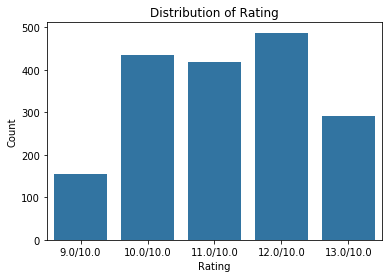

In [721]:
order_1 = ['9.0/10.0', '10.0/10.0', '11.0/10.0', '12.0/10.0', '13.0/10.0']
base_color = sb.color_palette()[0]
sb.countplot(data = df_final, x = 'rating',order=order_1, color=base_color)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(loc="upper left")
plt.title('Distribution of Rating');

From the above graph we see that most tweets have ratings between 10/10 and 12/10

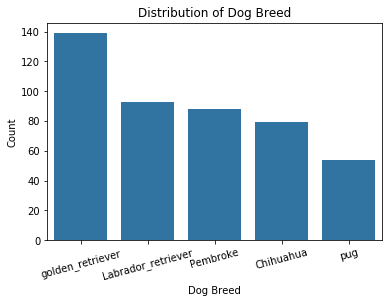

In [722]:
order_2 = ['golden_retriever', 'Labrador_retriever','Pembroke','Chihuahua','pug']
base_color = sb.color_palette()[0]
sb.countplot(data = df_final, x = 'p1', order=order_2, color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Distribution of Dog Breed');

For the given dataset most tweets are about golden_retriever breed followed by labrador_retriver and Prembroke

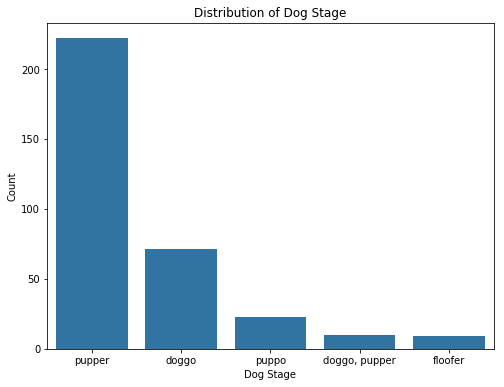

In [723]:
plt.figure(figsize=(8,6))
order_3 = ['pupper', 'doggo','puppo','doggo, pupper','floofer']
base_color = sb.color_palette()[0]
sb.countplot(data = df_final, x = 'dog_stage', color=base_color, order = order_3)
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Distribution of Dog Stage');

As seen from the above graph most tweets are about pupper followed by doggo and puppo

In [724]:
df_final.groupby('p1')['retweet_count'].mean().sort_values(ascending=False).astype(int)[0:5]

p1
Arabian_camel    17297
conch            17200
upright          15714
bubble           14793
gondola          14256
Name: retweet_count, dtype: int64

In [725]:
df_final.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).astype(int)[0:5]

p1
laptop       60425
conch        43064
limousine    42414
Angora       42370
fountain     40716
Name: favorite_count, dtype: int64

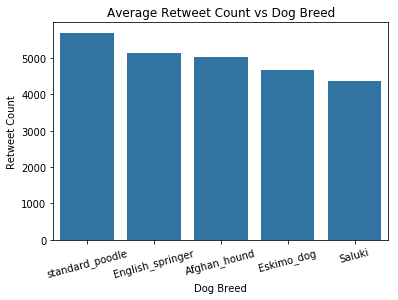

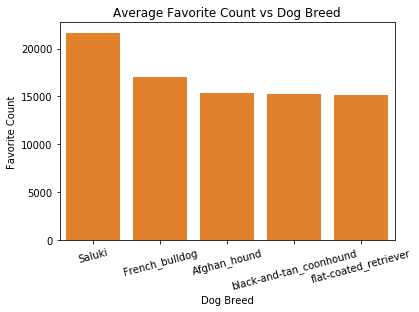

In [726]:
plt.figure()
orders = ['standard_poodle', 'English_springer','Afghan_hound','Eskimo_dog','Saluki']
base_color = sb.color_palette()[0]
sb.barplot(data = df_final, x = 'p1', y= 'retweet_count', ci=None, order=orders, color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count vs Dog Breed');

plt.figure()
base_color = sb.color_palette()[1]
orders = ['Saluki','French_bulldog','Afghan_hound','black-and-tan_coonhound', 'flat-coated_retriever']
sb.barplot(data = df_final, x = 'p1', y= 'favorite_count', ci=None, order=orders, color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count vs Dog Breed');

In [727]:
df_final.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).astype(int)

dog_stage
doggo, puppo      16860
doggo              5831
puppo              5719
doggo, pupper      3531
floofer            3514
doggo, floofer     2949
pupper             2108
Name: retweet_count, dtype: int64

In [728]:
df_final.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).astype(int)

dog_stage
doggo, puppo      43445
puppo             20373
doggo             17060
doggo, floofer    15471
doggo, pupper     12016
floofer            9821
pupper             6488
Name: favorite_count, dtype: int64

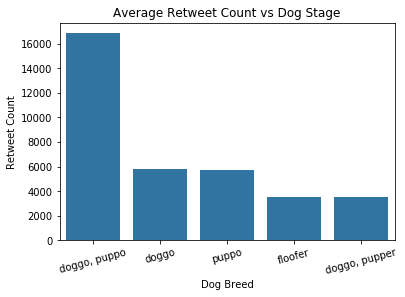

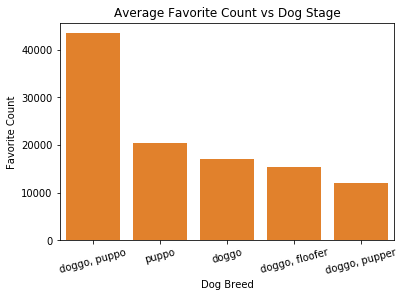

In [729]:
plt.figure()
orders = ['doggo, puppo', 'doggo', 'puppo','floofer','doggo, pupper']
base_color = sb.color_palette()[0]
sb.barplot(data = df_final, x = 'dog_stage', y= 'retweet_count', order=orders, color=base_color, ci=None)
plt.xticks(rotation=15)
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count vs Dog Stage');

plt.figure()
orders = ['doggo, puppo', 'puppo', 'doggo','doggo, floofer','doggo, pupper']
base_color = sb.color_palette()[1]
sb.barplot(data = df_final, x = 'dog_stage', y= 'favorite_count', order=orders, color=base_color, ci=None)
plt.xticks(rotation=15)
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count vs Dog Stage');

Why is the dog with the highest rating?

In [735]:
df_final.iloc[df_final.actual_rating.idxmax(),:]

tweet_id                                                749981277374128128
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2016-07-04 15:00:45
source                   <a href="https://about.twitter.com/products/tw...
text                     This is Atticus. He's quite simply America af....
expanded_urls            https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                      1776
rating_denominator                                                      10
name                                                               Atticus
actual_rating                                                        177.6
dog_stage                                                              NaN
jpg_url                    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                  